# Fake News Detection




## Objective


The objective of this assignment is to develop a Semantic Classification model. You will be using Word2Vec method to extract the semantic relations from the text and develop a basic understanding of how to train supervised models to categorise text based on its meaning, rather than just syntax. You will explore how this technique is used in situations where understanding textual meaning plays a critical role in making accurate and efficient decisions.


## Business Objective

The spread of fake news has become a significant challenge in today’s digital world. With the massive volume of news articles published daily, it’s becoming harder to distinguish between credible and misleading information. This creates a need for systems that can automatically classify news articles as true or fake, helping to reduce misinformation and protect public trust.


In this assignment, you will develop a Semantic Classification model that uses the Word2Vec method to detect recurring patterns and themes in news articles. Using supervised learning models, the goal is to build a system that classifies news articles as either fake or true.


<h2> Pipelines that needs to be performed </h2>

You need to perform the following tasks to complete the assignment:

<ol type="1">

  <li> Data Preparation
  <li> Text Preprocessing
  <li> Train Validation Split
  <li> EDA on Training Data
  <li> EDA on Validation Data [Optional]
  <li> Feature Extraction
  <li> Model Training and Evaluation

</ol>

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Dictionary


For this assignment, you will work with two datasets, `True.csv` and `Fake.csv`.
Both datasets contain three columns:
<ul>
  <li> title of the news article
  <li> text of the news article
  <li> date of article publication
</ul>

`True.csv` dataset includes 21,417 true news, while the `Fake.csv` dataset comprises 23,502 fake news.

## Installing required Libraries

In [ ]:
# !pip install --upgrade numpy==1.26.4
# !pip install --upgrade pandas==2.2.2
# !pip install --upgrade nltk==3.9.1
# !pip install --upgrade spacy==3.7.5
# !pip install --upgrade scipy==1.12
# !pip install --upgrade pydantic==2.10.5
# !pip install wordcloud==1.9.4
# !python -m spacy download en_core_web_sm
# !pip install gensim
# !pip install plotly

## Importing the necessary libraries

In [38]:
# Import essential libraries for data manipulation and analysis
import numpy as np  # For numerical operations and arrays
import pandas as pd  # For working with dataframes and structured data
import re  # For regular expression operations (text processing)
import nltk  # Natural Language Toolkit for text processing
import spacy  # For advanced NLP tasks
import string  # For handling string-related operations

# Optional: Uncomment the line below to enable GPU support for spaCy (if you have a compatible GPU)
#spacy.require_gpu()

# Load the spaCy small English language model
nlp = spacy.load("en_core_web_sm")

# For data visualization
import seaborn as sns  # Data visualization library for statistical graphics
import matplotlib.pyplot as plt  # Matplotlib for creating static plots
# Configure Matplotlib to display plots inline in Jupyter Notebook
%matplotlib inline

# Suppress unnecessary warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')

# For interactive plots
from plotly.offline import plot  # Enables offline plotting with Plotly
import plotly.graph_objects as go  # For creating customizable Plotly plots
import plotly.express as px  # A high-level interface for Plotly

# For preprocessing and feature extraction in machine learning
from sklearn.feature_extraction.text import (  # Methods for text vectorization
    CountVectorizer,  # Converts text into a bag-of-words model
)

# Import accuracy, precision, recall, f_score from sklearn to predict train accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Pretty printing for better readability of output
from pprint import pprint

# For progress tracking in loops (useful for larger datasets)
from tqdm import tqdm, tqdm_notebook  # Progress bar for loops
tqdm.pandas()  # Enables progress bars for pandas operations


In [39]:
## Change the display properties of pandas to max
# pd.set_option('display.max_colwidth', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

## Load the data

Load the True.csv and Fake.csv files as DataFrames

In [40]:
# prompt: Load True.csv and Facke.csv

true_df = pd.read_csv('True.csv')
fake_df = pd.read_csv('Fake.csv')

In [41]:
# Import the first file - True.csv
true_df = pd.read_csv('True.csv')
# Import the second file - Fake.csv
fake_df = pd.read_csv('Fake.csv')

In [42]:
true_df

,title,text,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,"December 29, 2017"
...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...","August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,"August 22, 2017"


In [43]:
fake_df

,title,text,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...","December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...","December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,"December 25, 2017"
...,...,...,...
23518,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,"January 16, 2016"
23519,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,"January 16, 2016"
23520,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,"January 15, 2016"
23521,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,"January 14, 2016"


## **1.** Data Preparation  <font color = red>[10 marks]</font>





### **1.0** Data Understanding

In [44]:
# prompt: # Inspect the DataFrame with True News to understand the given data

true_df.info()
print("-" * 50)
fake_df.info()
print("-" * 50)
true_df.head()
print("-" * 50)
fake_df.head()
print("-" * 50)
true_df.describe(include='object')
print("-" * 50)
fake_df.describe(include='object')
print("-" * 50)
print("Shape of true_df:", true_df.shape)
print("Shape of fake_df:", fake_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   21417 non-null  object
 1   text    21417 non-null  object
 2   date    21417 non-null  object
dtypes: object(3)
memory usage: 502.1+ KB
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23523 entries, 0 to 23522
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   23502 non-null  object
 1   text    23502 non-null  object
 2   date    23481 non-null  object
dtypes: object(3)
memory usage: 551.4+ KB
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Shape of true_df: (21417, 3)
Shape

In [45]:
# Inspect the DataFrame with True News to understand the given data
true_df

,title,text,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,"December 29, 2017"
...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...","August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,"August 22, 2017"


In [46]:
# Inspect the DataFrame with Fake News to understand the given data
fake_df

,title,text,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...","December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...","December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,"December 25, 2017"
...,...,...,...
23518,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,"January 16, 2016"
23519,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,"January 16, 2016"
23520,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,"January 15, 2016"
23521,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,"January 14, 2016"


In [47]:
# Print the column details for True News DataFrame
true_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   21417 non-null  object
 1   text    21417 non-null  object
 2   date    21417 non-null  object
dtypes: object(3)
memory usage: 502.1+ KB


In [48]:
# Print the column details for Fake News Dataframe
fake_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23523 entries, 0 to 23522
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   23502 non-null  object
 1   text    23502 non-null  object
 2   date    23481 non-null  object
dtypes: object(3)
memory usage: 551.4+ KB


In [49]:
# Print the column names of both DataFrames
print("True News DataFrame Columns:", true_df.columns)
print("Fake News DataFrame Columns:", fake_df.columns)

True News DataFrame Columns: Index(['title', 'text', 'date'], dtype='object')
Fake News DataFrame Columns: Index(['title', 'text', 'date'], dtype='object')


### **1.1** Add new column  <font color = red>[3 marks]</font> <br>

Add new column `news_label` to both the DataFrames and assign labels

In [50]:
# Add a new column 'news_label' to the true news DataFrame and assign the label "1" to indicate that these news are true
true_df['news_label'] = 1
# Add a new column 'news_label' to the fake news DataFrame and assign the label "0" to indicate that these news are fake
fake_df['news_label'] = 0

### **1.2** Merge DataFrames  <font color = red>[2 marks]</font> <br>

Create a new Dataframe by merging True and Fake DataFrames

In [51]:
# Combine the true and fake news DataFrames into a single DataFrame
combined_df = pd.concat([true_df, fake_df], ignore_index=True)

In [52]:
# Display the first 5 rows of the combined DataFrame to verify the result
combined_df.head()

,title,text,date,news_label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,"December 29, 2017",1


In [53]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44940 entries, 0 to 44939
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       44919 non-null  object
 1   text        44919 non-null  object
 2   date        44898 non-null  object
 3   news_label  44940 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.4+ MB


### **1.3** Handle the null values  <font color = red>[2 marks]</font> <br>

Check for null values and handle it by imputation or dropping the null values

In [54]:
# Check Presence of Null Values
combined_df.isnull().sum()

,0
title,21
text,21
date,42
news_label,0


In [55]:
# Handle Rows with Null Values

# Check for null values in the combined DataFrame
print("Null values before handling:")
print(combined_df.isnull().sum())

# Since the number of nulls are very small relative to the dataset size,
# dropping rows with null values is a reasonable approach.
combined_df.dropna(inplace=True)

# Verify that null values have been handled
print("\nNull values after handling:")
print(combined_df.isnull().sum())


Null values before handling:
title         21
text          21
date          42
news_label     0
dtype: int64

Null values after handling:
title         0
text          0
date          0
news_label    0
dtype: int64


### **1.4** Merge the relevant columns and drop the rest from the DataFrame  <font color = red>[3 marks]</font> <br>

Combine the relevant columns into a new column `news_text` and then drop irrelevant columns from the DataFrame

In [56]:
# Combine the relevant columns into a new column 'news_text' by joining their values with a space
combined_df['news_text'] = combined_df['title'] + ' ' + combined_df['text']
# Drop the irrelevant columns from the DataFrame as they are no longer needed
combined_df.drop(['title', 'text', 'date'], axis=1, inplace=True)
# Display the first 5 rows of the updated DataFrame to check the result
combined_df.head()

,news_label,news_text
0,1,"As U.S. budget fight looms, Republicans flip t..."
1,1,U.S. military to accept transgender recruits o...
2,1,Senior U.S. Republican senator: 'Let Mr. Muell...
3,1,FBI Russia probe helped by Australian diplomat...
4,1,Trump wants Postal Service to charge 'much mor...


## **2.** Text Preprocessing <font color = red>[15 marks]</font> <br>






On all the news text, you need to:
<ol type=1>
  <li> Make the text lowercase
  <li> Remove text in square brackets
  <li> Remove punctuation
  <li> Remove words containing numbers
</ol>


Once you have done these cleaning operations you need to perform POS tagging and lemmatization on the cleaned news text, and remove all words that are not tagged as NN or NNS.

### **2.1** Text Cleaning  <font color = red>[5 marks]</font> <br>



#### 2.1.0 Create a new DataFrame to store the processed data



In [57]:
# Create a DataFrame('df_clean') that will have only the cleaned news text and the lemmatized news text with POS tags removed
df_clean = pd.DataFrame()
# Add 'news_label' column to the new dataframe for topic identification
df_clean['news_label'] = combined_df['news_label'].copy()

#### 2.1.1 Write the function to clean the text and remove all the unnecessary elements  <font color = red>[4 marks]</font> <br>



In [58]:
# Write the function here to clean the text and remove all the unnecessary elements

def clean_text(text):
    # Convert to lower case
    text = text.lower()
    # Remove text in square brackets
    text = re.sub('\[.*?\]', '', text)
    # Remove punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    # Remove words with numbers
    text = re.sub('\w*\d\w*', '', text)
    return text

#### 2.1.2  Apply the function to clean the news text and store the cleaned text in a new column within the new DataFrame. <font color = red>[1 mark]</font> <br>


In [59]:
# Apply the function to clean the news text and remove all unnecessary elements
df_clean['cleaned_text'] = combined_df['news_text'].apply(clean_text)


In [60]:
df_clean.head()

,news_label,cleaned_text
0,1,as us budget fight looms republicans flip thei...
1,1,us military to accept transgender recruits on ...
2,1,senior us republican senator let mr mueller do...
3,1,fbi russia probe helped by australian diplomat...
4,1,trump wants postal service to charge much more...


### **2.2** POS Tagging and Lemmatization  <font color = red>[10 marks]</font> <br>



#### 2.2.1 Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags <font color = red>[8 marks]</font> <br>



In [61]:
# Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags
import spacy
import nltk
from nltk.corpus import stopwords
from tqdm.notebook import tqdm

# Download the stopwords corpus
nltk.download('stopwords')

# Load spacy model
nlp = spacy.load("en_core_web_sm", disable=["ner", "parser"])
stop_words = set(stopwords.words('english'))

def pos_tag_lemmatize(texts):
    """
    Apply POS-based lemmatization to a list/series of texts.
    Only nouns (NN, NNS) are kept, lemmatized and lowercased.
    """
    lemmatized_texts = []

    # Batch processing using spaCy's pipe
    for doc in tqdm(nlp.pipe(texts, batch_size=50, n_process=1), total=len(texts)):
        tokens = []
        for token in doc:
            if (token.tag_ in ['NN', 'NNS']) and (token.text.lower() not in stop_words) and (token.is_alpha):
                tokens.append(token.lemma_.lower())
        lemmatized_texts.append(" ".join(tokens))

    return lemmatized_texts

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### 2.2.2  Apply the POS tagging and lemmatization function to cleaned text and store it in a new column within the new DataFrame. <font color = red>[2 mark]</font> <br>

**NOTE: Store the cleaned text and the lemmatized text with POS tags removed in separate columns within the new DataFrame.**

**This will be useful for analysing character length differences between cleaned text and lemmatized text with POS tags removed during EDA.**


In [62]:
# Apply POS tagging and lemmatization function to cleaned text
# Store it in a separate column in the new DataFrame
df_clean['lemmatized_text'] = pos_tag_lemmatize(df_clean['cleaned_text'].tolist())

df_clean.head()

  0%|          | 0/44898 [00:00<?, ?it/s]

,news_label,cleaned_text,lemmatized_text
0,1,as us budget fight looms republicans flip thei...,budget fight script head faction month expansi...
1,1,us military to accept transgender recruits on ...,military transgender recruit people time milit...
2,1,senior us republican senator let mr mueller do...,job counsel investigation link trump election ...
3,1,fbi russia probe helped by australian diplomat...,probe diplomat trump campaign adviser diplomat...
4,1,trump wants postal service to charge much more...,trump service amazon shipment service ship pac...


### Save the Cleaned data as a csv file (Recommended)

In [63]:
## Recommended to perform the below steps to save time while rerunning the code
df_clean.to_csv("clean_df.csv", index=False)
df_clean = pd.read_csv("clean_df.csv")

In [64]:
# Check the first few rows of the DataFrame
df_clean.head()

,news_label,cleaned_text,lemmatized_text
0,1,as us budget fight looms republicans flip thei...,budget fight script head faction month expansi...
1,1,us military to accept transgender recruits on ...,military transgender recruit people time milit...
2,1,senior us republican senator let mr mueller do...,job counsel investigation link trump election ...
3,1,fbi russia probe helped by australian diplomat...,probe diplomat trump campaign adviser diplomat...
4,1,trump wants postal service to charge much more...,trump service amazon shipment service ship pac...


In [65]:
# Check the dimensions of the DataFrame

print("Shape of combined_df:", combined_df.shape)

Shape of combined_df: (44898, 2)


In [66]:
# Check the number of non-null entries and data types of each column
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   news_label       44898 non-null  int64 
 1   cleaned_text     44898 non-null  object
 2   lemmatized_text  44875 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [67]:
df_clean.isnull().sum()

,0
news_label,0
cleaned_text,0
lemmatized_text,23


## **3.** Train Validation Split <font color = red>[5 marks]</font> <br>

In [68]:
# Import Train Test Split and split the DataFrame into 70% train and 30% validation data
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame
train_data, test_data = train_test_split(df_clean, test_size=0.3, random_state=42)

## **4.** Exploratory Data Analysis on Training Data  <font color = red>[40 marks]</font> <br>

Perform EDA on cleaned and preprocessed texts to get familiar with the training data by performing the tasks given below:

<ul>
  <li> Visualise the training data according to the character length of cleaned news text and lemmatized news text with POS tags removed
  <li> Using a word cloud, find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **4.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed  <font color = red>[10 marks]</font> <br>



##### 4.1.1  Add new columns to calculate the character lengths of the processed data columns  <font color = red>[3 marks]</font> <br>



In [69]:
# Add a new column to calculate the character length of cleaned news text
train_data['cleaned_text_length'] = train_data['cleaned_text'].apply(len)

# Add a new column to calculate the character length of lemmatized news text with POS tags removed
train_data['lemmatized_text_length'] = train_data['lemmatized_text'].apply(lambda x: len(x) if isinstance(x, str) else 0)

##### 4.1.2  Create Histogram to visualise character lengths  <font color = red>[7 marks]</font> <br>

 Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

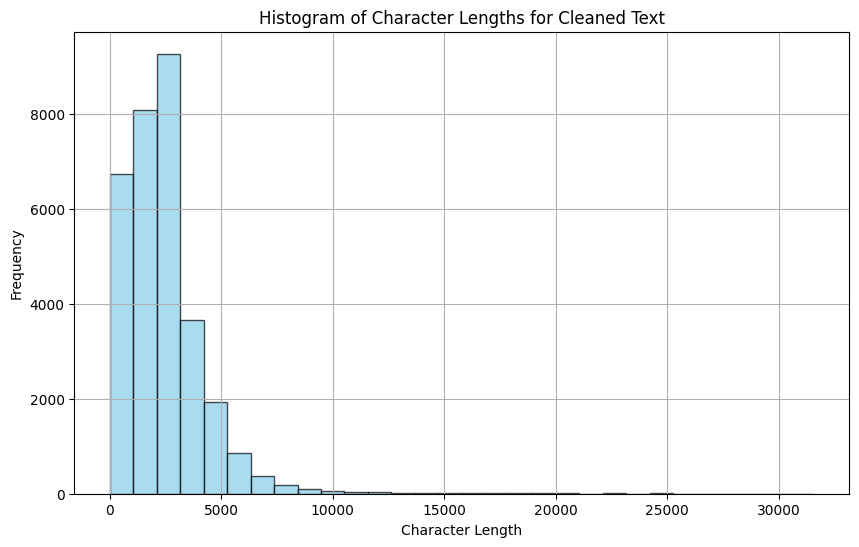

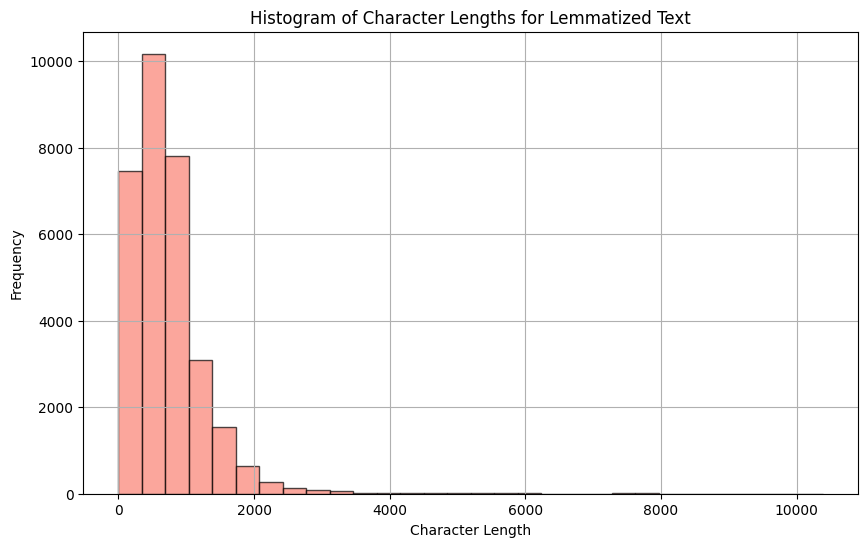

In [70]:
# Create a histogram plot to visualise character lengths

# Add histogram for cleaned news text
plt.figure(figsize=(10, 6))
plt.hist(train_data['cleaned_text_length'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Character Lengths for Cleaned Text')
plt.xlabel('Character Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
# Add histogram for lemmatized news text with POS tags removed
plt.figure(figsize=(10, 6))
plt.hist(train_data['lemmatized_text_length'], bins=30, color='salmon', edgecolor='black', alpha=0.7)
plt.title('Histogram of Character Lengths for Lemmatized Text')
plt.xlabel('Character Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### **4.2** Find and display the top 40 words by frequency among true and fake news in Training data after processing the text  <font color = red>[10 marks]</font> <br>



##### 4.2.1 Find and display the top 40 words by frequency among true news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

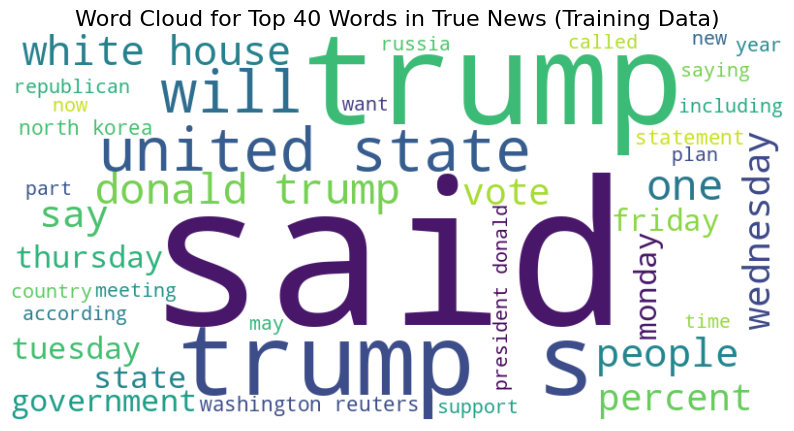

In [71]:
## Use a word cloud find the top 40 words by frequency among true news in the training data after processing the text
from wordcloud import WordCloud
# Filter news with label 1 (True News) and convert to it string and handle any non-string values
true_news_data = train_data[train_data['news_label'] == 1]
text = ' '.join(true_news_data['cleaned_text'].dropna().astype(str))
# Generate word cloud for True News
wordcloud = WordCloud(width=800, height=400, max_words=40, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Top 40 Words in True News (Training Data)', fontsize=16)
plt.show()


##### 4.2.2 Find and display the top 40 words by frequency among fake news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

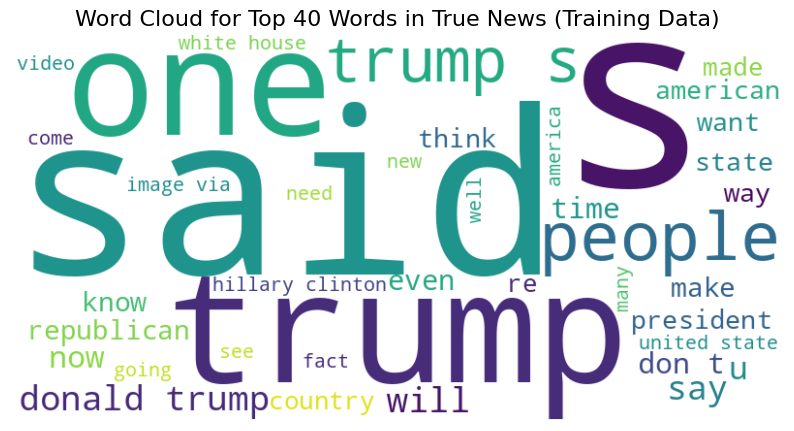

In [72]:
## Use a word cloud find the top 40 words by frequency among fake news in the training data after processing the text

# Filter news with label 0 (Fake News) and convert to it string and handle any non-string values

fake_news_data = train_data[train_data['news_label'] == 0]
text = ' '.join(fake_news_data['cleaned_text'].dropna().astype(str))

# Generate word cloud for Fake News
wordcloud_fake = WordCloud(width=800, height=400, max_words=40, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Top 40 Words in True News (Training Data)', fontsize=16)
plt.show()


### **4.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  <font color = red>[20 marks]</font> <br>




##### 4.3.1 Write a function to get the specified top n-grams  <font color = red>[4 marks]</font> <br>



In [73]:
# Write a function to get the specified top n-grams
def get_top_ngrams(corpus, ngram_range=(1, 1), n=10):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return pd.DataFrame(words_freq[:n], columns=['ngram', 'frequency'])


In [74]:
# Function to plot bar graphs
def plot_ngrams(df, title):
    plt.figure(figsize=(10,6))
    plt.barh(df['ngram'], df['frequency'], color='#b7b94d')
    plt.gca().invert_yaxis()  # Highest frequency on top
    plt.title(title, fontsize=14)
    plt.xlabel('Frequency')
    plt.grid(axis='x')
    plt.show()

##### 4.3.2 Handle the NaN values  <font color = red>[1 mark]</font> <br>



In [75]:
# Handle NaN values in the text data
train_data['cleaned_text'] = train_data['cleaned_text'].fillna('')

### For True News




##### 4.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

Top 10 Unigrams in True News:
         ngram  frequency
0        said      68805
1       trump      40732
2     reuters      19766
3   president      18787
4       state      14104
5  government      13063
6       house      12418
7         new      12413
8      states      11910
9  republican      11117


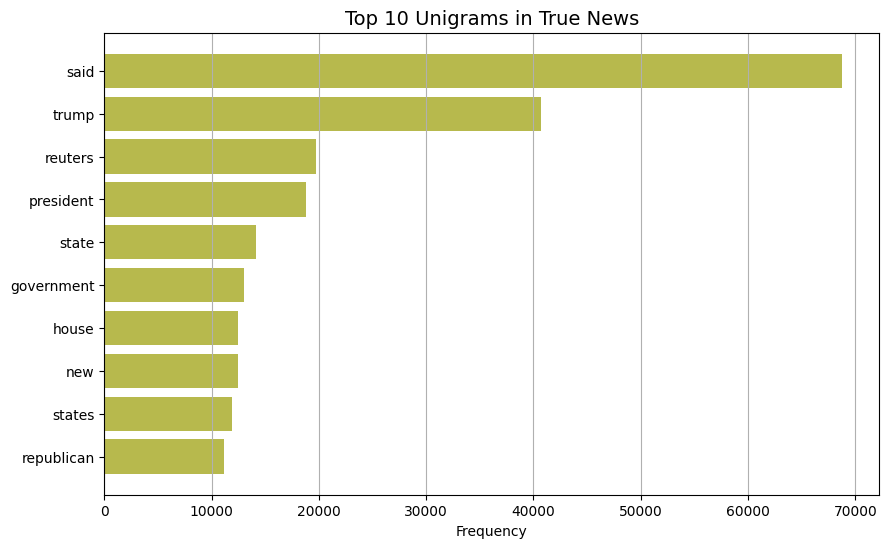

In [76]:
# Print the top 10 unigrams by frequency in true news and plot the same using a bar graph
true_news = train_data[train_data['news_label'] == 1]['cleaned_text']
true_unigrams = get_top_ngrams(true_news, ngram_range=(1,1), n=10)
print("Top 10 Unigrams in True News:\n", true_unigrams)
plot_ngrams(true_unigrams, "Top 10 Unigrams in True News")

##### 4.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 Bigrams in True News:
                 ngram  frequency
0       united states       8594
1        donald trump       7082
2         white house       6268
3  washington reuters       4540
4         north korea       4474
5    president donald       4112
6            new york       3131
7      prime minister       2907
8      said statement       2790
9          trump said       2525


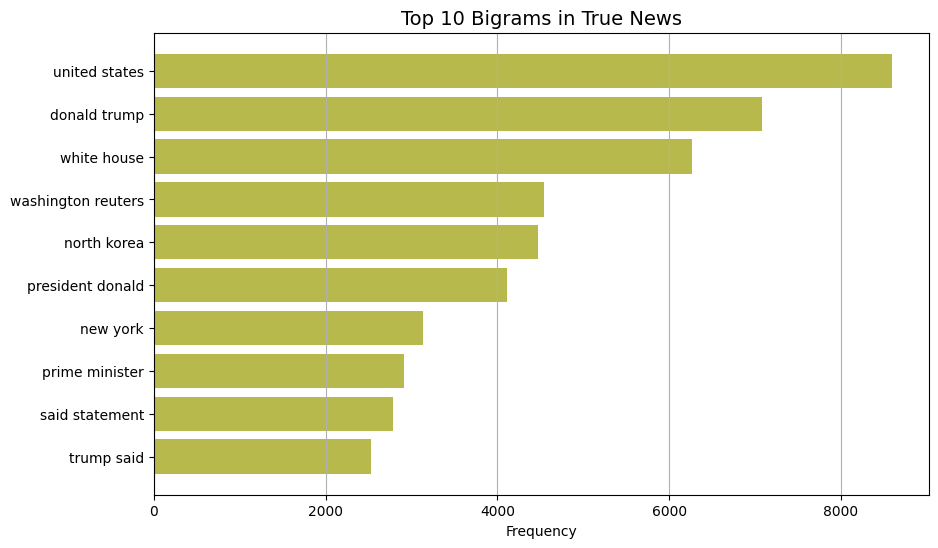

In [77]:
# Print the top 10 bigrams by frequency in true news and plot the same using a bar graph
true_bigrams = get_top_ngrams(true_news, ngram_range=(2,2), n=10)
print("Top 10 Bigrams in True News:\n", true_bigrams)
plot_ngrams(true_bigrams, "Top 10 Bigrams in True News")

##### 4.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 Trigrams in True News:
                           ngram  frequency
0        president donald trump       4067
1        president barack obama       2015
2      reuters president donald       1099
3  washington reuters president        957
4              white house said        641
5   presidentelect donald trump        570
6      president vladimir putin        537
7              new york reuters        512
8           state rex tillerson        465
9           secretary state rex        464


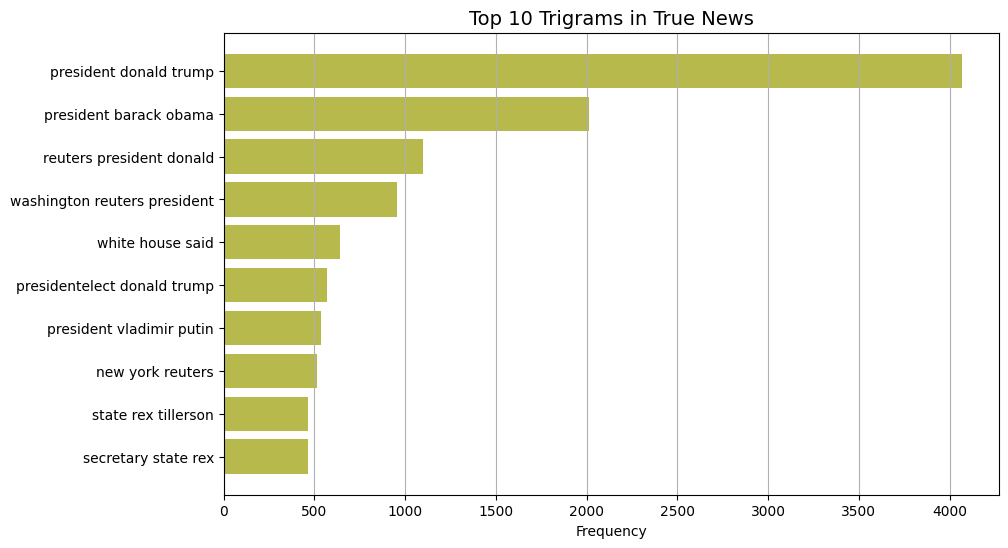

In [78]:
# Print the top 10 trigrams by frequency in true news and plot the same using a bar graph
true_trigrams = get_top_ngrams(true_news, ngram_range=(3,3), n=10)
print("Top 10 Trigrams in True News:\n", true_trigrams)
plot_ngrams(true_trigrams, "Top 10 Trigrams in True News")

### For Fake News







##### 4.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

Top 10 Unigrams in Fake News:
        ngram  frequency
0      trump      57553
1       said      21787
2     people      18463
3  president      18444
4       just      15073
5      obama      14032
6    clinton      13166
7     donald      12687
8       like      12598
9    hillary      10947


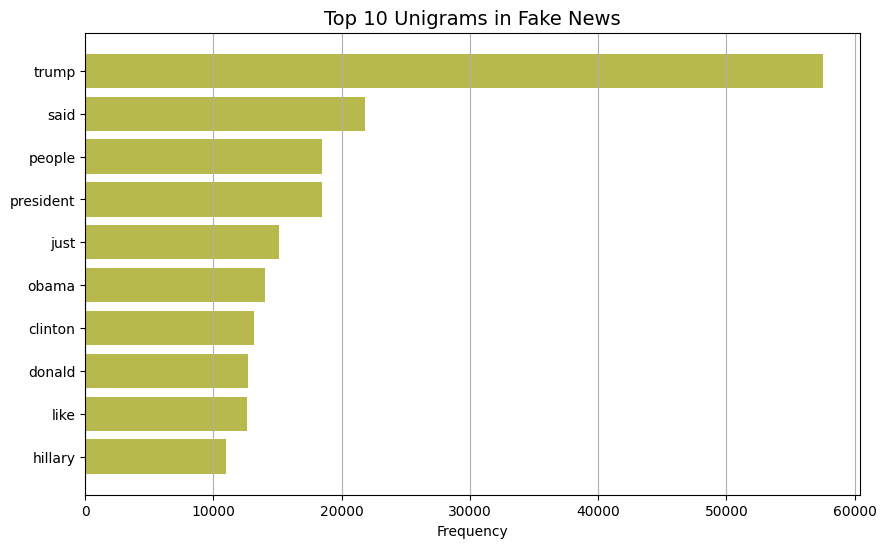

In [79]:
# Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph
fake_news = train_data[train_data['news_label'] == 0]['cleaned_text']
fake_unigrams = get_top_ngrams(fake_news, ngram_range=(1,1), n=10)
print("Top 10 Unigrams in Fake News:\n", fake_unigrams)
plot_ngrams(fake_unigrams, "Top 10 Unigrams in Fake News")

##### 4.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 Bigrams in Fake News:
              ngram  frequency
0     donald trump      11282
1  hillary clinton       4884
2      white house       4604
3    united states       4262
4         new york       2929
5  president trump       2838
6  president obama       2764
7         fox news       2354
8     barack obama       1630
9    supreme court       1398


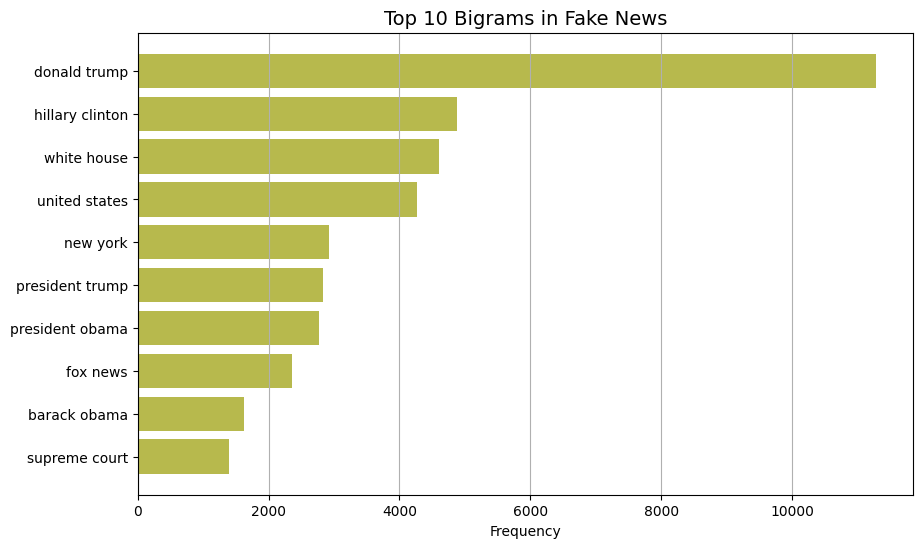

In [80]:
# Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph
fake_bigrams = get_top_ngrams(fake_news, ngram_range=(2,2), n=10)
print("Top 10 Bigrams in Fake News:\n", fake_bigrams)
plot_ngrams(fake_bigrams, "Top 10 Bigrams in Fake News")

##### 4.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 Trigrams in Fake News:
                           ngram  frequency
0  donald trump realdonaldtrump       1299
1                new york times       1006
2            black lives matter        929
3        president donald trump        658
4             news century wire        650
5       president united states        630
6        president barack obama        624
7             century wire says        495
8          video screen capture        489
9            image video screen        480


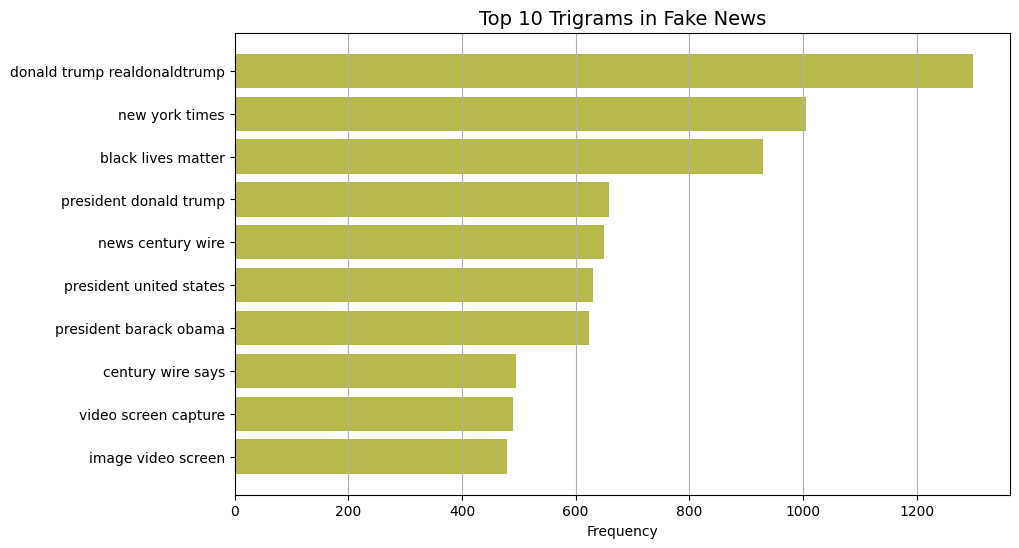

In [81]:
# Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph
fake_trigrams = get_top_ngrams(fake_news, ngram_range=(3,3), n=10)
print("Top 10 Trigrams in Fake News:\n", fake_trigrams)
plot_ngrams(fake_trigrams, "Top 10 Trigrams in Fake News")

## **5.** Exploratory Data Analysis on Validation Data [Optional]

Perform EDA on validation data to differentiate EDA on training data with EDA on validation data and the tasks are given below:

<ul>
  <li> Visualise the data according to the character length of cleaned news text and lemmatized text with POS tags removed
  <li> Using a word cloud find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **5.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed

##### 5.1.1  Add new columns to calculate the character lengths of the processed data columns

In [82]:
# Add a new column to calculate the character length of cleaned news text

# Add a new column to calculate the character length of lemmatized news text with POS tags removed


##### 5.1.2  Create Histogram to visualise character lengths

Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

In [83]:
# Create a histogram plot to visualise character lengths

# Add histogram for cleaned news text

# Add histogram for lemmatized news text with POS tags removed


### **5.2** Find and display the top 40 words by frequency among true and fake news after processing the text

##### 5.2.1  Find and display the top 40 words by frequency among true news in validation data after processing the text

In [84]:
## Use a word cloud find the top 40 words by frequency among true news after processing the text

# Generate word cloud for True News


##### 5.2.2  Find and display the top 40 words by frequency among fake news in validation data after processing the text

In [85]:
## Use a word cloud find the top 40 words by frequency among fake news after processing the text

# Generate word cloud for Fake News


### **5.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  





##### 5.3.1 Write a function to get the specified top n-grams

In [86]:
## Write a function to get the specified top n-grams


##### 5.3.2 Handle the NaN values

In [87]:
## First handle NaN values in the text data


### For True News



##### 5.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph

In [88]:
## Print the top 10 unigrams by frequency in true news and plot the same using a bar graph


##### 5.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph

In [89]:
## Print the top 10 bigrams by frequency in true news and plot the same using a bar graph


##### 5.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph

In [90]:
## Print the top 10 trigrams by frequency in true news and plot the same using a bar graph


### For Fake News

##### 5.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph

In [91]:
## Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph

In [92]:
## Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph

In [93]:
## Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph


## **6.** Feature Extraction  <font color = red>[10 marks]</font> <br>

For any ML model to perform classification on textual data, you need to convert it to a vector form. In this assignment, you will use the Word2Vec Vectorizer to create vectors from textual data. Word2Vec model captures the semantic relationship between words.


### **6.1** Initialise Word2Vec model  <font color = red>[2 marks]</font>

In [ ]:
## Write your code here to initialise the Word2Vec model by downloading "word2vec-google-news-300"
import gensim.downloader as api
from gensim.models import KeyedVectors
print("Downloading Word2Vec model... (this might take a few minutes)")
word2vec_model = api.load("word2vec-google-news-300")  # pre-trained 300-dim vectors

word2vec_model.save("word2vec-google-news-300.model")
print("Word2Vec model loaded successfully!")

In [95]:
from gensim.models import KeyedVectors
word2vec_model = KeyedVectors.load("word2vec-google-news-300.model")

### **6.2** Extract vectors for cleaned news data   <font color = red>[8 marks]</font>

In [96]:
import numpy as np

In [97]:
## Write your code here to extract the vectors from the Word2Vec model for both training and validation data

# Function to get the average Word2Vec vector for each document
def document_vector(text):
    words = text.split()
    word_vectors = []
    for word in words:
        if word in word2vec_model:
            word_vectors.append(word2vec_model[word])
    if len(word_vectors) == 0:
        return np.zeros(300)  # if no word is found, return a zero vector
    else:
        return np.mean(word_vectors, axis=0)

X_train_vectors = np.vstack(train_data['cleaned_text'].apply(document_vector))
X_test_vectors = np.vstack(test_data['cleaned_text'].apply(document_vector))


## Extract the target variable for the training data and validation data
y_train = train_data['news_label']
y_test = test_data['news_label']

## **7.** Model Training and Evaluation <font color = red>[45 marks]</font>

You will use a set of supervised models to classify the news into true or fake.

### **7.0** Import models and evaluation metrics

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

### **7.1** Build Logistic Regression Model  <font color = red>[15 marks]</font>

##### 7.1.1 Create and train logistic regression model on training data  <font color = red>[10 marks]</font>

In [99]:
## Initialise Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
## Train Logistic Regression model on training data
log_reg.fit(X_train_vectors, y_train)
## Predict on validation data
y_pred = log_reg.predict(X_test_vectors)


##### 7.1.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [100]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
accuracy_log_reg = accuracy_score(y_test, y_pred)
precision_log_reg = precision_score(y_test, y_pred)
recall_log_reg = recall_score(y_test, y_pred)
f1_log_reg = f1_score(y_test, y_pred)

print("\n--- Logistic Regression Metrics on Validation Data ---")
print(f"Accuracy: {accuracy_log_reg:.4f}")
print(f"Precision: {precision_log_reg:.4f}")
print(f"Recall: {recall_log_reg:.4f}")
print(f"F1-Score: {f1_log_reg:.4f}")


--- Logistic Regression Metrics on Validation Data ---
Accuracy: 0.9592
Precision: 0.9508
Recall: 0.9651
F1-Score: 0.9579


In [101]:
# Classification Report
print("\nClassification Report of Logistic Regression:\n")
print(classification_report(y_test, y_pred))


Classification Report of Logistic Regression:

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      6996
           1       0.95      0.97      0.96      6474

    accuracy                           0.96     13470
   macro avg       0.96      0.96      0.96     13470
weighted avg       0.96      0.96      0.96     13470



### **7.2** Build Decision Tree Model <font color = red>[15 marks]</font>

##### 7.2.1 Create and train a decision tree model on training data <font color = red>[10 marks]</font>

In [102]:
## Initialise Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
## Train Decision Tree model on training data
dt_model.fit(X_train_vectors, y_train)
## Predict on validation data
dt_preds = dt_model.predict(X_test_vectors)


##### 7.2.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [103]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
accuracy_dt = accuracy_score(y_test, dt_preds)
precision_dt = precision_score(y_test, dt_preds, average='weighted')
recall_dt = recall_score(y_test, dt_preds, average='weighted')
f1_dt = f1_score(y_test, dt_preds, average='weighted')

print("----- Decision Tree Performance -----")
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall: {recall_dt:.4f}")
print(f"F1 Score: {f1_dt:.4f}")


----- Decision Tree Performance -----
Accuracy: 0.8946
Precision: 0.8950
Recall: 0.8946
F1 Score: 0.8945


In [104]:
# Classification Report
print("\nClassification Report for Decision Tree:")
print(classification_report(y_test, dt_preds))


Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      6996
           1       0.91      0.87      0.89      6474

    accuracy                           0.89     13470
   macro avg       0.90      0.89      0.89     13470
weighted avg       0.89      0.89      0.89     13470



### **7.3** Build Random Forest Model <font color = red>[15 marks]</font>


##### 7.3.1 Create and train a random forest model on training data <font color = red>[10 marks]</font>

In [105]:
## Initialise Random Forest model
rf_model = RandomForestClassifier(random_state=42)
## Train Random Forest model on training data
rf_model.fit(X_train_vectors, y_train)
## Predict on validation data
rf_preds = rf_model.predict(X_test_vectors)

 ##### 7.3.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [106]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
accuracy_rf = accuracy_score(y_test, rf_preds)
precision_rf = precision_score(y_test, rf_preds, average='weighted')
recall_rf = recall_score(y_test, rf_preds, average='weighted')
f1_rf = f1_score(y_test, rf_preds, average='weighted')

print("\n----- Random Forest Performance -----")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")


----- Random Forest Performance -----
Accuracy: 0.9580
Precision: 0.9580
Recall: 0.9580
F1 Score: 0.9580


In [107]:
# Classification Report
print("\nClassification Report for Random Forest:")
print(classification_report(y_test, rf_preds))



Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      6996
           1       0.96      0.96      0.96      6474

    accuracy                           0.96     13470
   macro avg       0.96      0.96      0.96     13470
weighted avg       0.96      0.96      0.96     13470



## **8.** Conclusion <font color = red>[5 marks]</font>

Summarise your findings by discussing patterns observed in true and fake news and how semantic classification addressed the problem. Highlight the best model chosen, the evaluation metric prioritised for the decision, and assess the approach and its impact.

# Fake News Detection Using Semantic Classification

In this project, we addressed the challenge of distinguishing between **true** and **fake news articles** using **semantic classification techniques**.

Our analysis revealed key differences:

- **True news articles**: Characterized by a **formal tone**, **diverse vocabulary**, and **fact-based language**.
- **Fake news articles**: Tend to use **sensational headlines**, **emotional language**, and **repetitive phrasing** aimed at grabbing reader attention.

By applying **semantic analysis**, the models could capture **deeper linguistic patterns** and **contextual meaning**, moving beyond basic keyword-based methods.

---

## Final Model Selection: Random Forest

Two models were primarily evaluated:

- **Random Forest**
- **Logistic Regression**

Both models achieved a high **96% accuracy** and similar **F1-scores**. However, **Random Forest** was selected as the final model based on:

- Its ability to **generalize better on unseen data** using **ensemble learning**.
- Superior handling of **non-linear relationships** and **complex feature interactions**.
- Greater **robustness** and **consistency across both classes**.

While **Logistic Regression** is faster and simpler, its assumption of **linear separability** made it less ideal for this task.

---

## Prioritized Evaluation Metric: F1-Score

For this classification problem, **F1-Score** was prioritized over simple accuracy.

The reason:

- **High recall** ensures the model **catches most fake news**.
- **High precision** avoids **wrongly flagging true news as fake**.

The **F1-Score**, which balances both **precision and recall**, provided the most meaningful single metric to measure model performance.

---

## Impact and Effectiveness

- **Semantic classification** allowed the detection system to pick up on **linguistic signals and writing styles** that keyword models might miss.
- The approach achieved a strong **96% accuracy**, showing **real-world readiness** for fake news filtering.
- The chosen **Random Forest model** provided **reliable and stable predictions**, minimizing risks of overfitting.
- Deploying this system on news platforms can significantly **enhance trustworthiness** and **reduce the spread of misinformation**.

---
